# ggplot 440 - format dates with scale_x/y_date

There are many ways to show a date.  
scale_x/y_date lets you control the used format. 

# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get data

In [2]:
sug = pd.read_csv('./dat/sugar.csv')
sug.head(10)

,date,sugar,weight
0,21-5-2014,9.3,84.9
1,25-5-2014,7.4,85.1
2,28-5-2014,9.1,84.9
3,1-6-2014,9.1,86.1
4,4-6-2014,6.9,85.4
5,9-6-2014,10.2,86.3
6,15-6-2014,10.4,85.9
7,18-6-2014,8.4,85.9
8,25-6-2014,10.3,86.2
9,3-7-2014,8.7,87.0


This file contains 10 measurements of the blood glucose level and weight of a person on 10 dates.
- date: date of the measurement (format dd-mm-yyyy)
- sugar: the [blood glucose level](https://en.wikipedia.org/wiki/Blood_sugar) measurement in mmol/L
- weight: the weight of the person in kg.

# 2 - attempt to make a line plot

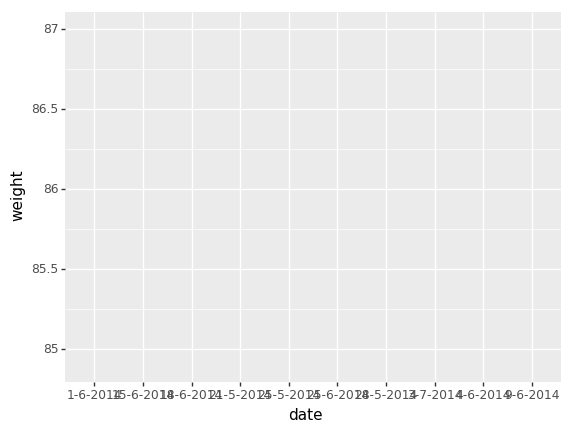

<ggplot: (-9223372036841622321)>

In [3]:
ggplot(data=sug, mapping=aes(x='date', y='weight')) + \
    geom_line()

Clearly something went wrong. Geom_line() does not know how to handle a date.  
Lets check what the type of date is.

In [4]:
sug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
date      10 non-null object
sugar     10 non-null float64
weight    10 non-null float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


Date is handled as a string, we can not produce line plots with strings on the x-axis.  
We need to convert date to a datetime variable.

# 3 - convert date to datetime

In [5]:
import datetime as dt 

sug['datetime'] = sug['date'].apply(lambda x: dt.datetime.strptime(x, "%d-%m-%Y"))

print(sug.info())
sug.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
date        10 non-null object
sugar       10 non-null float64
weight      10 non-null float64
datetime    10 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 400.0+ bytes
None


,date,sugar,weight,datetime
0,21-5-2014,9.3,84.9,2014-05-21
1,25-5-2014,7.4,85.1,2014-05-25
2,28-5-2014,9.1,84.9,2014-05-28
3,1-6-2014,9.1,86.1,2014-06-01
4,4-6-2014,6.9,85.4,2014-06-04


In [6]:
# drop the old date column
sug = sug[ ["datetime","sugar","weight"]  ]
# rename the first column to date
sug.columns= ["date","sugar","weight"]
# show the result
print(sug.info())
sug.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
date      10 non-null datetime64[ns]
sugar     10 non-null float64
weight    10 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 320.0 bytes
None


,date,sugar,weight
0,2014-05-21,9.3,84.9
1,2014-05-25,7.4,85.1
2,2014-05-28,9.1,84.9
3,2014-06-01,9.1,86.1
4,2014-06-04,6.9,85.4


# 4 - second attempt to make a line plot

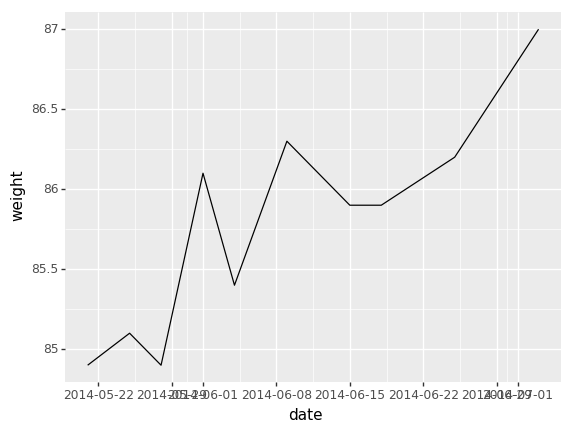

<ggplot: (-9223372036841578629)>

In [7]:
ggplot(data=sug, mapping=aes(x='date', y='weight')) + \
    geom_line() 

That is better.   
But the date labels along the x-axis are unreadable.  We have to format them.

# 5 - format the dates

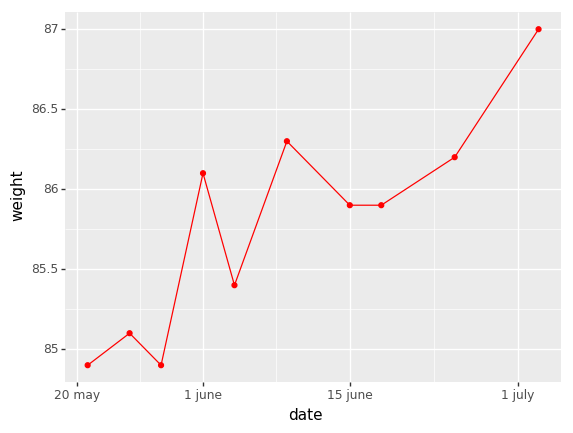

<ggplot: (13242916)>

In [8]:
ggplot(data=sug, mapping=aes(x='date', y='weight')) + \
    geom_point(color='red') + \
    geom_line(color='red') + \
    scale_x_date(breaks=['2014-05-20', '2014-06-01','2014-06-15','2014-07-01'],
                 labels=['20 may','1 june','15 june','1 july'])

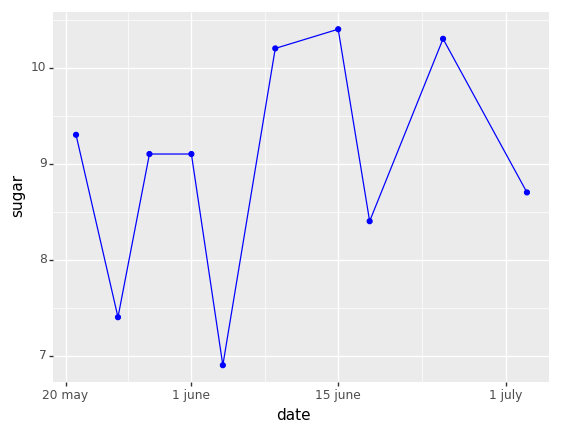

<ggplot: (-9223372036841469482)>

In [9]:
ggplot(data=sug, mapping=aes(x='date', y='sugar')) + \
    geom_point(color='blue') + \
    geom_line(color='blue') + \
    scale_x_date(breaks=['2014-05-20', '2014-06-01','2014-06-15','2014-07-01'],
                 labels=['20 may','1 june','15 june','1 july'])

# 6 - playtime 

As an exercise lets try to plot both figures in one plot.  
The idea is that we want to check if blood sugar rises when we are gaining weight.

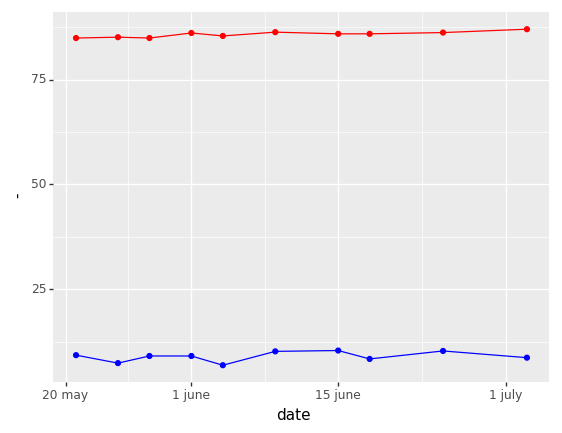

<ggplot: (-9223372036841399769)>

In [10]:
ggplot(data=sug, mapping=aes(x='date')) + \
    scale_x_date(breaks=['2014-05-20', '2014-06-01','2014-06-15','2014-07-01'],
                 labels=['20 may','1 june','15 june','1 july']) + \
    geom_point(mapping=aes(y='weight'), color='red') + \
    geom_line(mapping=aes(y='weight'), color='red') + \
    geom_point(mapping=aes(y='sugar'), color='blue') + \
    geom_line(mapping=aes(y='sugar'), color='blue') + \
    ylab('-')


It is hard to see if blood sugar rises when we are gaining weight.  
The version below is better for that.

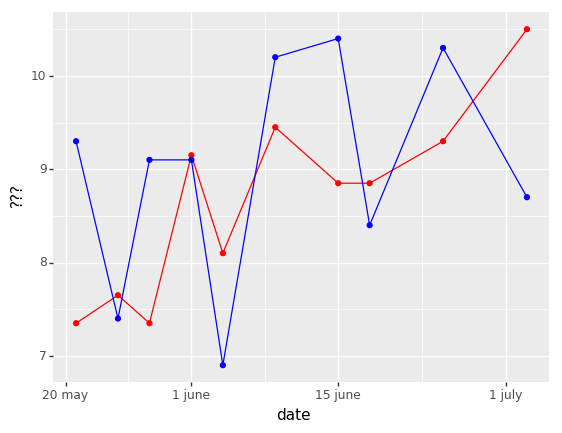

<ggplot: (-9223372036841404142)>

In [11]:
ggplot(data=sug, mapping=aes(x='date')) + \
    scale_x_date(breaks=['2014-05-20', '2014-06-01','2014-06-15','2014-07-01'],
                 labels=['20 may','1 june','15 june','1 july']) + \
    geom_point(mapping=aes(y='1.5*(weight-80)'), color='red') + \
    geom_line(mapping=aes(y='1.5*(weight-80)'), color='red') + \
    geom_point(mapping=aes(y='sugar'), color='blue') + \
    geom_line(mapping=aes(y='sugar'), color='blue') + \
    ylab('???')


This figure seems to suggest that sugar rises when weight rises (but not always).  
The main problem with this plot is that the values along the y-axis are hard to interpret.  

To answer our question we could try two index's.  
We set both values of 21 may to 100, and scale the other values proportionally.  
Now the y-axis is simply an index.

In [12]:
sug['idx_s'] = sug['sugar']*100/9.3
sug['idx_w'] = sug['weight']*100/84.9

sug.head(10)

,date,sugar,weight,idx_s,idx_w
0,2014-05-21,9.3,84.9,100.000000,100.000000
1,2014-05-25,7.4,85.1,79.569892,100.235571
2,2014-05-28,9.1,84.9,97.849462,100.000000
3,2014-06-01,9.1,86.1,97.849462,101.413428
4,2014-06-04,6.9,85.4,74.193548,100.588928
5,2014-06-09,10.2,86.3,109.677419,101.648999
6,2014-06-15,10.4,85.9,111.827957,101.177856
7,2014-06-18,8.4,85.9,90.322581,101.177856
8,2014-06-25,10.3,86.2,110.752688,101.531213
9,2014-07-03,8.7,87.0,93.548387,102.473498


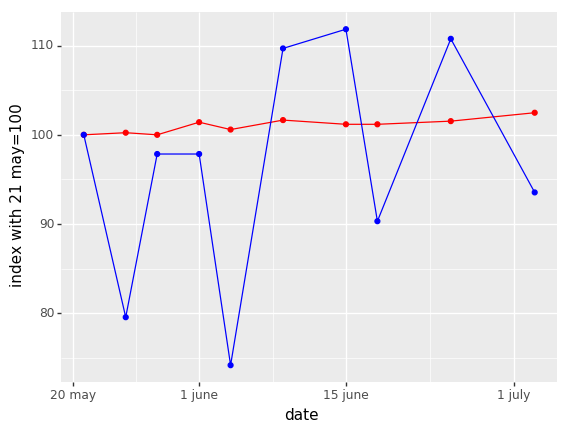

<ggplot: (13461715)>

In [13]:
ggplot(data=sug, mapping=aes(x='date')) + \
    scale_x_date(breaks=['2014-05-20', '2014-06-01','2014-06-15','2014-07-01'],
                 labels=['20 may','1 june','15 june','1 july']) + \
    geom_point(mapping=aes(y='idx_w'), color='red') + \
    geom_line(mapping=aes(y='idx_w'), color='red') + \
    geom_point(mapping=aes(y='idx_s'), color='blue') + \
    geom_line(mapping=aes(y='idx_s'), color='blue') + \
    ylab('index with 21 may=100')
